In [1]:
!pip install lale
import lale


In [2]:
!pip install hyperopt==0.2.5 

In [3]:
!pip install 'liac-arff>=2.4.0'

In [4]:
from sklearn.preprocessing import Normalizer as Norm
from sklearn.preprocessing import OneHotEncoder as OneHot
from lale.lib.lale import Project, ConcatFeatures, NoOp
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier as XGBoost
from lale import wrap_imported_operators
wrap_imported_operators()

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
data=pd.read_csv('train.csv')

In [7]:
data.dropna(inplace=True)

In [8]:
data=data.drop(['Loan_ID'],axis=1)

In [9]:
X=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


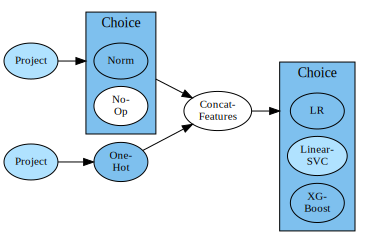

In [12]:
from lale.operators import make_pipeline, make_union

planned_pipeline = make_pipeline(
    make_union(
        make_pipeline(Project(columns={'type': 'number'}), Norm | NoOp),
        make_pipeline(Project(columns={'type': 'string'}), OneHot)),
    LR | LinearSVC(dual=False)| XGBoost)
planned_pipeline.visualize()

In [13]:
from lale.lib.lale import Hyperopt
trained_pipeline = planned_pipeline.auto_configure(
    X_train, y_train, Hyperopt, cv=3, max_evals=10)

100%|██████████| 10/10 [00:25<00:00,  2.57s/trial, best loss: -0.8161993769470405]


accuracy 80.5%


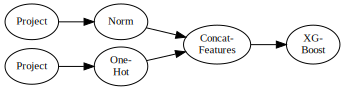

In [14]:
from sklearn.metrics import accuracy_score
predictions = trained_pipeline.predict(X_test)
print(f'accuracy {accuracy_score(y_test, predictions):.1%}')
trained_pipeline.visualize()

In [15]:
trained_pipeline.pretty_print(ipython_display=True)

```python
from lale.lib.lale import Project
from sklearn.preprocessing import Normalizer as Norm
from sklearn.preprocessing import OneHotEncoder as OneHot
from lale.lib.lale import ConcatFeatures
from xgboost import XGBClassifier as XGBoost
import lale

lale.wrap_imported_operators()
project_0 = Project(columns={"type": "number"})
norm = Norm(norm="l1")
project_1 = Project(columns={"type": "string"})
xg_boost = XGBoost(
    gamma=0.6777027692905079,
    learning_rate=0.17593648838262638,
    max_depth=6,
    min_child_weight=8,
    n_estimators=539,
    reg_alpha=0.9512239065933292,
    reg_lambda=0.37306909889575746,
    subsample=0.8844821246070534,
)
pipeline = (
    ((project_0 >> norm) & (project_1 >> OneHot))
    >> ConcatFeatures()
    >> xg_boost
)
```